In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/data_mining/project/phase1/movie_metadata.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/movie_metadata.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

In [ ]:
df.drop('movie_imdb_link', axis=1, inplace=True)
df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
#Removing the color (most of the movies is colored)
df["color"].value_counts()
df.drop('color',axis=1,inplace=True)
#Removing the language (Most of the languages is english)
df["language"].value_counts()
df.drop('language',axis=1,inplace=True)
#Countries: US && UK && other
value_counts=df["country"].value_counts()
vals = value_counts[:2].index
df['country'] = df.country.where(df.country.isin(vals), 'other')

In [ ]:
#Adding feature 'Profit'
df["Profit"]=df['budget'].sub(df['gross'], axis = 0) 
df['Profit_Percentage']=(df["Profit"]/df["gross"])*100

In [ ]:
df["content_rating"].fillna("R", inplace = True) 
df["aspect_ratio"].fillna(df["aspect_ratio"].median(),inplace=True)
df["budget"].fillna(df["budget"].median(),inplace=True)
df['gross'].fillna(df['gross'].median(),inplace=True)
# Recheck null values
df.isna().sum()

director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                  0
num_user_for_reviews           0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
Profit                       887
Profit_Percentage            887
dtype: int64

In [ ]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage'],
      dtype='object')

**Preprocess**


In [ ]:
df.drop('director_name', axis=1, inplace=True)
df.drop('actor_1_name',axis=1,inplace=True)
df.drop('actor_2_name',axis=1,inplace=True)
df.drop('actor_3_name',axis=1,inplace=True)
df.drop('movie_title',axis=1,inplace=True)
df.drop('plot_keywords',axis=1,inplace=True)
#Most of the values are equally distributed in genres column ,so we can remove the genres column
df.drop('genres',axis=1,inplace =True)

 Remove the linear dependant variables

In [ ]:
df.drop('Profit',axis=1,inplace=True)
df.drop('Profit_Percentage',axis=1,inplace=True)

Remove the coreelated variables

In [ ]:
df['Other_actor_facebbok_likes']=df["actor_2_facebook_likes"] + df['actor_3_facebook_likes']
df.drop('actor_2_facebook_likes',axis=1,inplace=True)
df.drop('actor_3_facebook_likes',axis=1,inplace=True)
df.drop('cast_total_facebook_likes',axis=1,inplace=True)
df['critic_review_ratio']=df['num_critic_for_reviews']/df['num_user_for_reviews']
df.drop('num_critic_for_reviews',axis=1,inplace=True)
df.drop('num_user_for_reviews',axis=1,inplace=True)

In [ ]:
df["imdb_binned_score"]=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1
df.drop('imdb_score',axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

duration  director_facebook_likes  actor_1_facebook_likes        gross  \
0     178.0                      0.0                  1000.0  760505847.0   
1     169.0                    563.0                 40000.0  309404152.0   
2     148.0                      0.0                 11000.0  200074175.0   
3     164.0                  22000.0                 27000.0  448130642.0   
5     132.0                    475.0                   640.0   73058679.0   

   num_voted_users  facenumber_in_poster country content_rating       budget  \
0           886204                   0.0     USA          PG-13  237000000.0   
1           471220                   0.0     USA          PG-13  300000000.0   
2           275868                   1.0      UK          PG-13  245000000.0   
3          1144337                   0.0     USA          PG-13  250000000.0   
5           212204                   1.0     USA          PG-13  263700000.0   

   title_year  aspect_ratio  movie_facebook_likes  Other_actor_facebbok_likes  \
0      2009.0          1.78                 33000                      1791.0   
1      2007.0          2.35                     0                      6000.0   
2      2015.0          2.35                 85000                       554.0   
3      2012.0          2.35                164000                     46000.0   
5      2012.0          2.35                 24000                      1162.0   

   critic_review_ratio  imdb_binned_score  
0             0.236739                  3  
1             0.243942                  3  
2             0.605634                  3  
3             0.301000                  4  
5             0.626016                  3

In [ ]:
def classify_country(movie_country):
  if(movie_country == 'USA'):
    return 1
  else:
    return 0
df['american movie'] = df['country'].apply(classify_country)
# df.drop('country',axis=1,inplace=True)

Handeling categoricals

In [ ]:
df = pd.get_dummies(data = df, columns = ['country'] , prefix = ['country'] , drop_first = True)
df = pd.get_dummies(data = df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [ ]:
df.head()

duration  director_facebook_likes  actor_1_facebook_likes        gross  \
0     178.0                      0.0                  1000.0  760505847.0   
1     169.0                    563.0                 40000.0  309404152.0   
2     148.0                      0.0                 11000.0  200074175.0   
3     164.0                  22000.0                 27000.0  448130642.0   
5     132.0                    475.0                   640.0   73058679.0   

   num_voted_users  facenumber_in_poster       budget  title_year  \
0           886204                   0.0  237000000.0      2009.0   
1           471220                   0.0  300000000.0      2007.0   
2           275868                   1.0  245000000.0      2015.0   
3          1144337                   0.0  250000000.0      2012.0   
5           212204                   1.0  263700000.0      2012.0   

   aspect_ratio  movie_facebook_likes  Other_actor_facebbok_likes  \
0          1.78                 33000                      1791.0   
1          2.35                     0                      6000.0   
2          2.35                 85000                       554.0   
3          2.35                164000                     46000.0   
5          2.35                 24000                      1162.0   

   critic_review_ratio  imdb_binned_score  american movie  country_USA  \
0             0.236739                  3               1            1   
1             0.243942                  3               1            1   
2             0.605634                  3               0            0   
3             0.301000                  4               1            1   
5             0.626016                  3               1            1   

   country_other  content_rating_G  content_rating_GP  content_rating_M  \
0              0                 0                  0                 0   
1              0                 0                  0                 0   
2              0                 0                  0                 0   
3              0                 0                  0                 0   
5              0                 0                  0                 0   

   content_rating_NC-17  content_rating_Not Rated  content_rating_PG  \
0                     0                         0                  0   
1                     0                         0                  0   
2                     0                         0                  0   
3                     0                         0                  0   
5                     0                         0                  0   

   content_rating_PG-13  content_rating_Passed  content_rating_R  \
0                     1                      0                 0   
1                     1                      0                 0   
2                     1                      0                 0   
3                     1                      0                 0   
5                     1                      0                 0   

   content_rating_TV-14  content_rating_TV-G  content_rating_TV-PG  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
5                     0                    0                     0   

   content_rating_Unrated  content_rating_X  
0                       0                 0  
1                       0                 0  
2                       0                 0  
3                       0                 0  
5                       0                 0

In [ ]:
columns_needed = ['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users',
                        'facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes',
                        'Other_actor_facebbok_likes','critic_review_ratio','american movie','country_USA', 'country_other','content_rating_G',
                        'content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG',
                        'content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G',
                        'content_rating_TV-PG','content_rating_Unrated','content_rating_X']
X=pd.DataFrame(columns= columns_needed, data=df)
y=pd.DataFrame(columns=['imdb_binned_score'], data=df)


Find best k for cross validation

Text(0, 0.5, 'Testing Accuracy')

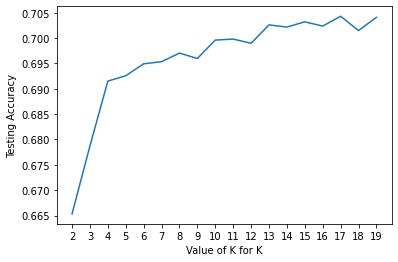

In [ ]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(max_iter=1000)


from sklearn import metrics
scores = []
k_range = range(2, 20)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
from sklearn.model_selection import KFold
for k in range (2, 20):
  kf = KFold(n_splits=k)
  kf.get_n_splits(X)
  Xn = X.to_numpy()
  yn = y.to_numpy()
  scores_fold = []
  for train_index, test_index in kf.split(X):
      X_trainf, X_testf = Xn[train_index], Xn[test_index]
      y_trainf, y_testf = yn[train_index], yn[test_index]
      X_trainf = sc_X.fit_transform(X_trainf)
      X_testf = sc_X.transform(X_testf)
      np.all(np.isfinite(X_trainf))
      np.any(np.isnan(X_trainf))
      logit.fit(X_trainf ,np.ravel(y_trainf,order='C'))
      y_pred=logit.predict(X_testf)
      scores_fold.append(metrics.accuracy_score(y_testf, y_pred)) 
  scores.append(sum(scores_fold) / len(scores_fold))
plt.xticks(k_range)
plt.plot(k_range, scores)
plt.xlabel('Value of K for K')
plt.ylabel('Testing Accuracy')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4694 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   duration                    4694 non-null   float64
 1   director_facebook_likes     4694 non-null   float64
 2   actor_1_facebook_likes      4694 non-null   float64
 3   gross                       4694 non-null   float64
 4   num_voted_users             4694 non-null   int64  
 5   facenumber_in_poster        4694 non-null   float64
 6   budget                      4694 non-null   float64
 7   title_year                  4694 non-null   float64
 8   aspect_ratio                4694 non-null   float64
 9   movie_facebook_likes        4694 non-null   int64  
 10  Other_actor_facebbok_likes  4694 non-null   float64
 11  critic_review_ratio         4694 non-null   float64
 12  american movie              4694 non-null   int64  
 13  country_USA                 4694 

In [ ]:
print(y['imdb_binned_score'].value_counts())

3    3014
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64


In [ ]:
X.head()

duration  director_facebook_likes  actor_1_facebook_likes        gross  \
0     178.0                      0.0                  1000.0  760505847.0   
1     169.0                    563.0                 40000.0  309404152.0   
2     148.0                      0.0                 11000.0  200074175.0   
3     164.0                  22000.0                 27000.0  448130642.0   
5     132.0                    475.0                   640.0   73058679.0   

   num_voted_users  facenumber_in_poster       budget  title_year  \
0           886204                   0.0  237000000.0      2009.0   
1           471220                   0.0  300000000.0      2007.0   
2           275868                   1.0  245000000.0      2015.0   
3          1144337                   0.0  250000000.0      2012.0   
5           212204                   1.0  263700000.0      2012.0   

   aspect_ratio  movie_facebook_likes  Other_actor_facebbok_likes  \
0          1.78                 33000                      1791.0   
1          2.35                     0                      6000.0   
2          2.35                 85000                       554.0   
3          2.35                164000                     46000.0   
5          2.35                 24000                      1162.0   

   critic_review_ratio  american movie  country_USA  country_other  \
0             0.236739               1            1              0   
1             0.243942               1            1              0   
2             0.605634               0            0              0   
3             0.301000               1            1              0   
5             0.626016               1            1              0   

   content_rating_G  content_rating_GP  content_rating_M  \
0                 0                  0                 0   
1                 0                  0                 0   
2                 0                  0                 0   
3                 0                  0                 0   
5                 0                  0                 0   

   content_rating_NC-17  content_rating_Not Rated  content_rating_PG  \
0                     0                         0                  0   
1                     0                         0                  0   
2                     0                         0                  0   
3                     0                         0                  0   
5                     0                         0                  0   

   content_rating_PG-13  content_rating_Passed  content_rating_R  \
0                     1                      0                 0   
1                     1                      0                 0   
2                     1                      0                 0   
3                     1                      0                 0   
5                     1                      0                 0   

   content_rating_TV-14  content_rating_TV-G  content_rating_TV-PG  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
5                     0                    0                     0   

   content_rating_Unrated  content_rating_X  
0                       0                 0  
1                       0                 0  
2                       0                 0  
3                       0                 0  
5                       0                 0

**balance data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_b = X_train.values
y_b = y_train.values
X_b, y_b = oversample.fit_resample(X_b, y_b)

In [ ]:
df.head()

duration  director_facebook_likes  actor_1_facebook_likes        gross  \
0     178.0                      0.0                  1000.0  760505847.0   
1     169.0                    563.0                 40000.0  309404152.0   
2     148.0                      0.0                 11000.0  200074175.0   
3     164.0                  22000.0                 27000.0  448130642.0   
5     132.0                    475.0                   640.0   73058679.0   

   num_voted_users  facenumber_in_poster       budget  title_year  \
0           886204                   0.0  237000000.0      2009.0   
1           471220                   0.0  300000000.0      2007.0   
2           275868                   1.0  245000000.0      2015.0   
3          1144337                   0.0  250000000.0      2012.0   
5           212204                   1.0  263700000.0      2012.0   

   aspect_ratio  movie_facebook_likes  Other_actor_facebbok_likes  \
0          1.78                 33000                      1791.0   
1          2.35                     0                      6000.0   
2          2.35                 85000                       554.0   
3          2.35                164000                     46000.0   
5          2.35                 24000                      1162.0   

   critic_review_ratio  imdb_binned_score  american movie  country_USA  \
0             0.236739                  3               1            1   
1             0.243942                  3               1            1   
2             0.605634                  3               0            0   
3             0.301000                  4               1            1   
5             0.626016                  3               1            1   

   country_other  content_rating_G  content_rating_GP  content_rating_M  \
0              0                 0                  0                 0   
1              0                 0                  0                 0   
2              0                 0                  0                 0   
3              0                 0                  0                 0   
5              0                 0                  0                 0   

   content_rating_NC-17  content_rating_Not Rated  content_rating_PG  \
0                     0                         0                  0   
1                     0                         0                  0   
2                     0                         0                  0   
3                     0                         0                  0   
5                     0                         0                  0   

   content_rating_PG-13  content_rating_Passed  content_rating_R  \
0                     1                      0                 0   
1                     1                      0                 0   
2                     1                      0                 0   
3                     1                      0                 0   
5                     1                      0                 0   

   content_rating_TV-14  content_rating_TV-G  content_rating_TV-PG  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
5                     0                    0                     0   

   content_rating_Unrated  content_rating_X  
0                       0                 0  
1                       0                 0  
2                       0                 0  
3                       0                 0  
5                       0                 0

Defining a new evaluation metric

In [ ]:
def new_metric(cnf_matrix_b):
  i = -1
  sum = 0
  for x in cnf_matrix_b:
    i = i + 1
    j = -1
    for y in x:
      j = j + 1
      if i != j:
        sum = sum - (10 * abs(i - j) * y)
      else:
        if i == 3:
          sum  = sum + y * 10
        else:
          sum = sum + y * 20
  return sum        

Data standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_copy = X_train.copy()
X_b_copy = X_b.copy()
X_test_copy = X_test.copy()
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_b = sc_X.fit_transform(X_b)

**Classification Model Selection**

**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

Accuracy: 0.7047551454932577
new_metric: 15200


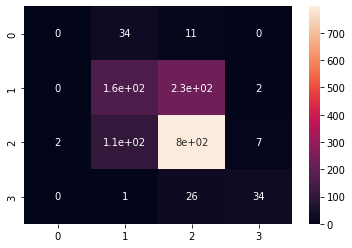

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("new_metric:",new_metric(cnf_matrix))

Accuracy: 0.49680624556423
new_metric: 5270


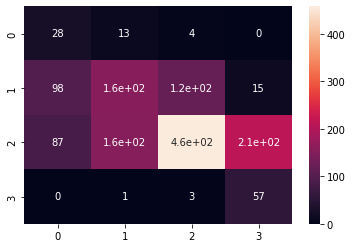

In [ ]:
logit.fit(X_b,np.ravel(y_b,order='C'))
y_pred=logit.predict(X_test)
cnf_matrix_b = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix_b, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("new_metric:",new_metric(cnf_matrix_b))

**2. MLP**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7253371185237757
Accuracy: 16000


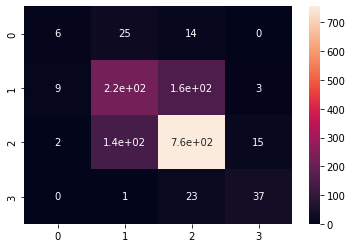

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(max_iter= 1000).fit(X_train, y_train)
y_pred = nn_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("new_metric:",new_metric(cnf_matrix))

Accuracy: 0.5677785663591199
Accuracy: 8820


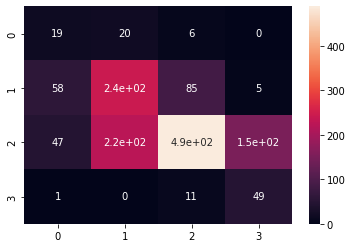

In [ ]:
nn_model = MLPClassifier(max_iter= 1000).fit(X_b, y_b)
y_pred = nn_model.predict(X_test)
cnf_matrix_b = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix_b, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("new_metric:",new_metric(cnf_matrix_b))

**3. KNN**


[[  0  23  22   0]
 [  0 181 210   0]
 [  0 143 769   0]
 [  0   0  48  13]]
Accuracy: 0.6834634492547906
new_metric: 14450


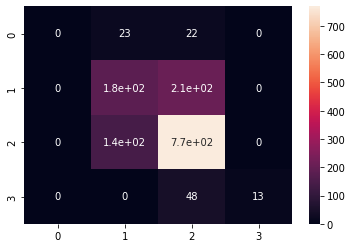

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
sns.heatmap(cnf_matrix, annot=True)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))
print("new_metric:",new_metric(cnf_matrix))

[[ 17  19   7   2]
 [ 84 189 103  15]
 [118 214 437 143]
 [  1   0  11  49]]
Accuracy: 0.49112845990063875
new_metric: 4720


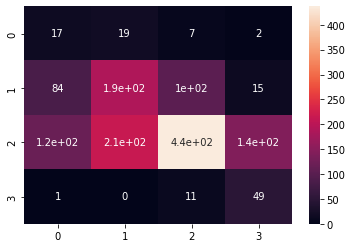

In [ ]:
knn.fit(X_b, np.ravel(y_b,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix_b = metrics.confusion_matrix(y_test, knnpred)
sns.heatmap(cnf_matrix_b, annot=True)
print(cnf_matrix_b)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))
print("new_metric:",new_metric(cnf_matrix_b))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Testing Accuracy')

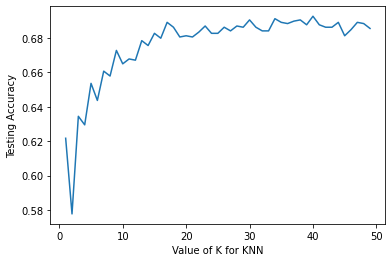

In [ ]:
k_range = range(1, 50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**4. SVC**


[[  0  32  13   0]
 [  0 179 212   0]
 [  2 174 718  18]
 [  0   3  31  27]]
Accuracy: 0.6557842441447835
new_metric: 13180


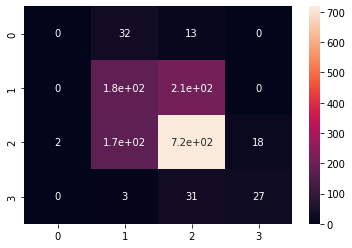

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
sns.heatmap(cnf_matrix, annot=True)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))
print("new_metric:",new_metric(cnf_matrix))

[[ 29  13   3   0]
 [183  94  91  23]
 [234 108 344 226]
 [  6   1  10  44]]
Accuracy: 0.36266855926188785
new_metric: -1930


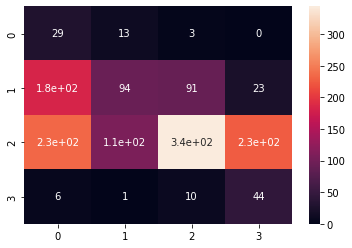

In [ ]:
svc.fit(X_b, np.ravel(y_b,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix_b = metrics.confusion_matrix(y_test, svcpred)
sns.heatmap(cnf_matrix_b, annot=True)
print(cnf_matrix_b)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))
print("new_metric:",new_metric(cnf_matrix_b))

**5. Naive Bayes**


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))
print("new_metric:",new_metric(cnf_matrix))

[[ 40   4   0   1]
 [339  25   1  26]
 [614  43   4 251]
 [ 11   0   0  50]]
Accuracy: 0.08445706174591909
new_metric: -17660


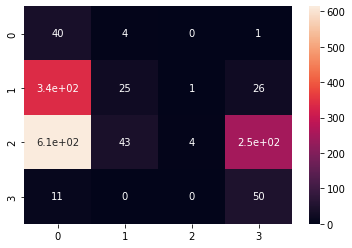

In [ ]:
sns.heatmap(cnf_matrix, annot=True)

**6. Decision Tree**


[[  4  27  14   0]
 [ 20 199 170   2]
 [  9 189 688  26]
 [  1   2  25  33]]
Accuracy: 0.6557842441447835
new_metric: 13010


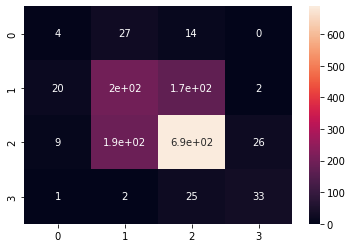

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entropy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))
print("new_metric:",new_metric(cnf_matrix))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[[  8  20  17   0]
 [ 46 189 149   7]
 [ 36 214 613  49]
 [  1   1  20  39]]
Accuracy: 0.602555003548616
new_metric: 10360


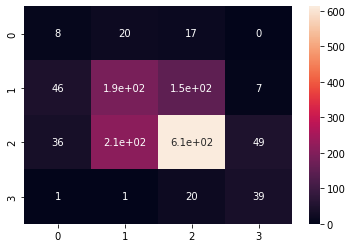

In [ ]:
dtree.fit(X_b, np.ravel(y_b,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix_b = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix_b)
sns.heatmap(cnf_matrix_b, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))
print("new_metric:",new_metric(cnf_matrix_b))

[[  5  21  19   0]
 [ 27 193 171   0]
 [ 25 183 683  21]
 [  1   2  24  34]]
Accuracy: 0.6493967352732435


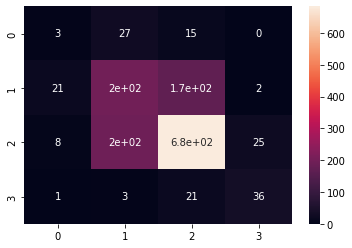

In [ ]:
dtree_ent = DecisionTreeClassifier(criterion='entropy') #criterion = entropy, gini
dtree_ent.fit(X_train, np.ravel(y_train,order='C'))
dtreepred_ent = dtree_ent.predict(X_test)
cnf_matrix_ent = metrics.confusion_matrix(y_test, dtreepred_ent)
print(cnf_matrix_ent)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred_ent))
sns.heatmap(cnf_matrix, annot=True)

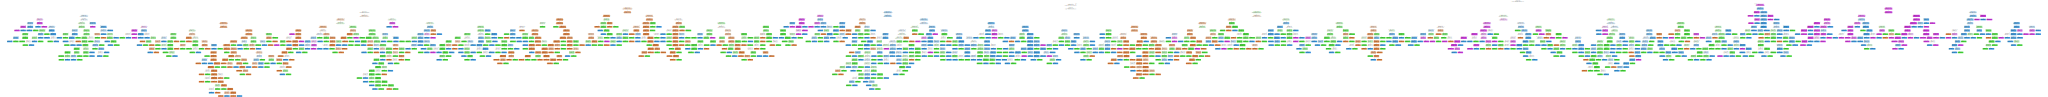

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtree, out_file="tree.dot", impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**7. Ada Boosting**


[[  4  25  16   0]
 [ 23 207 161   0]
 [  7 199 676  30]
 [  0   2  26  33]]
Accuracy: 0.6529453513129879
new_metric: 12930


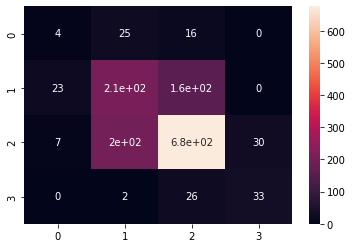

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))
print("new_metric:",new_metric(cnf_matrix))

[[ 11  24   9   1]
 [ 58 201 104  28]
 [ 66 257 310 279]
 [  1   1   9  50]]
Accuracy: 0.40596167494677077
new_metric: 1490


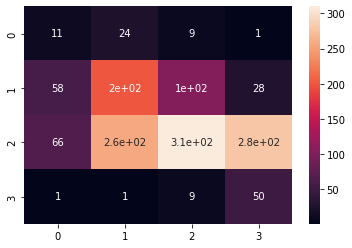

In [ ]:
abcl=abcl.fit(X_b,np.ravel(y_b,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))
print("new_metric:",new_metric(cnf_matrix))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 60, 70, 80, 90, 100, 250, 1000]}
abc = AdaBoostClassifier(base_estimator=dtree)
grid_search = GridSearchCV(estimator = abc , param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(X_test, y_test)
print(grid_search.best_params_)

{'n_estimators': 60}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**8. RandomForest**


[[  0  30  15   0]
 [  0 202 189   0]
 [  0  75 828   9]
 [  0   0  33  28]]
Accuracy: 0.7508871540099361
new_metric: 17220


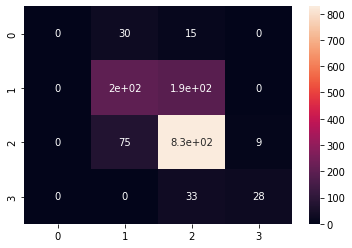

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train_copy, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test_copy)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))
print("new_metric:",new_metric(cnf_matrix))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[[  5  30  10   0]
 [ 12 243 136   0]
 [  8 136 743  25]
 [  0   1  23  37]]
Accuracy: 0.7295954577714692
new_metric: 16190


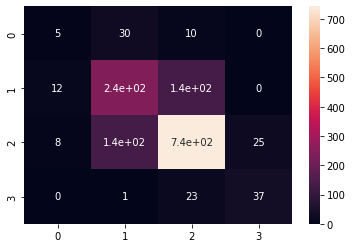

In [ ]:
rfc.fit(X_b_copy, np.ravel(y_b,order='C'))
rfcpred = rfc.predict(X_test_copy)
cnf_matrix_b = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix_b)
sns.heatmap(cnf_matrix_b, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))
print("new_metric:",new_metric(cnf_matrix_b))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  af

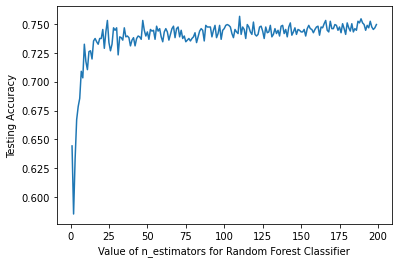

In [ ]:
scores =[]
for k in range(1, 200):
    rafocl = RandomForestClassifier(n_estimators=k)
    rafocl.fit(X_train, y_train)
    y_pred = rafocl.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc , param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(X_test, y_test)
print(grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 400}


In [ ]:
for tree_in_forest in rfc.estimators_:
    dot_data = export_graphviz(tree_in_forest, feature_names=X.columns, filled=True, rounded=True)

In [ ]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

**9. Bagging Classifier**


In [ ]:
new_df=df.pop("imdb_binned_score")

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=70, max_samples=.7 , oob_score=True)
bgcl = bgcl.fit(df, new_df)
print(bgcl.oob_score_)

0.746058798466127


In [ ]:
bgcl = bgcl.fit(df, new_df)
print(bgcl.oob_score_)

0.7464848743076268


In [ ]:
type(X_b)
df_xb = pd.DataFrame(X_b)
df_yb = pd.DataFrame(y_b)
df_b = pd.concat([df_xb, df_yb], axis=1)
bgcl = bgcl.fit(df_b, np.ravel(y_b,order='C')df_yb)
print(bgcl.oob_score_)

1.0


In [ ]:
param_grid = {'n_estimators': [10, 50, 60, 70, 80, 90, 100, 250, 1000]}
bc = BaggingClassifier(max_samples=.7 , oob_score=True)
grid_search = GridSearchCV(estimator = bc , param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(X_test, y_test)
print(grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'n_estimators': 90}


**10. Gradient Boosting**


[[  4  28  13   0]
 [  3 214 174   0]
 [  0 117 784  11]
 [  1   0  27  33]]
Accuracy: 0.7345635202271115
new_metric: 16480


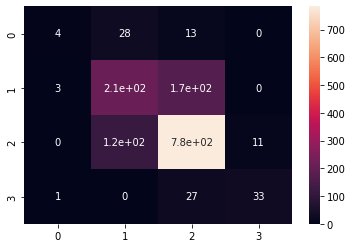

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("new_metric:",new_metric(cnf_matrix))

[[ 20  24   0   1]
 [ 97 266   0  28]
 [ 99 443   0 370]
 [  1   4   0  56]]
Accuracy: 0.2427253371185238
new_metric: -5740


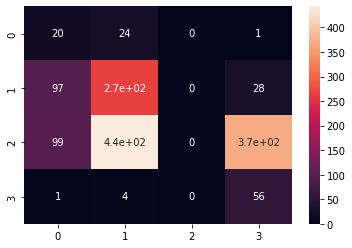

In [ ]:
gbcl = gbcl.fit(X_b,np.ravel(y_b,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix_b = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix_b)
sns.heatmap(cnf_matrix_b, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("new_metric:",new_metric(cnf_matrix_b))

**11. XGBooosting**

[[  2  31  12   0]
 [  0 209 182   0]
 [  0  96 805  11]
 [  1   0  29  31]]
Accuracy: 0.7430801987224982
new_metric: 16870


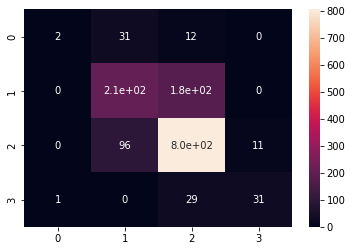

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, np.ravel(y_train,order='C'))
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))
print("new_metric:",new_metric(cnf_matrix))

[[ 34  10   0   1]
 [140 205   0  46]
 [167 289   0 456]
 [  2   1   0  58]]
Accuracy: 0.21078779276082327
new_metric: -7960


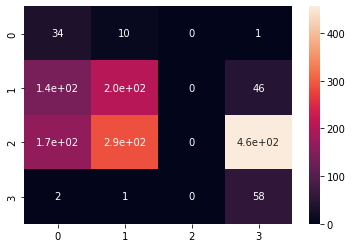

In [ ]:
xgb.fit(X_b, np.ravel(y_b,order='C'))
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))
print("new_metric:",new_metric(cnf_matrix))

**Model Comparison**


In [ ]:
from sklearn.metrics import classification_report
print('Logistic  Reports\n',classification_report(y_test, y_pred))
print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVC Reports\n',classification_report(y_test, svcpred))
print('Naive BayesReports\n',classification_report(y_test, gaussiannbpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Ada Boosting\n',classification_report(y_test, abcl_pred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Bagging Clasifier',bgcl.oob_score_)
print('Gradient Boosting',classification_report(y_test, test_pred))
print('XGBoosting\n',classification_report(y_test, xgbprd))

Logistic  Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.66      0.50      0.57       391
           3       0.77      0.91      0.84       912
           4       0.76      0.46      0.57        61

    accuracy                           0.75      1409
   macro avg       0.55      0.47      0.49      1409
weighted avg       0.72      0.75      0.72      1409

KNN Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.52      0.46      0.49       391
           3       0.73      0.84      0.78       912
           4       1.00      0.21      0.35        61

    accuracy                           0.68      1409
   macro avg       0.56      0.38      0.41      1409
weighted avg       0.66      0.68      0.66      1409

SVC Reports
               precision    recall  f1-score   support

           1       0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat